In [1]:
import scanpy as sc
import os 

In [2]:
data_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/adata/adata_scanvi.h5ad"

In [14]:
adata = sc.read_h5ad(data_dir)

In [15]:
adata

AnnData object with n_obs × n_vars = 152319 × 18088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden', 'celltypist_labels_Immune_All_High_highconf', 'GenAnno', 'GenAnnoV1', 'GenAnnoV2', 'celltypist_mapped', 'GenAnnoHighConf', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'GenAnnoHighConf_colors', 'GenAnnoV1_colors', 'GenAnnoV2_colors', 'celltypist_labels_Immune_All_High_highconf_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_pca_MD

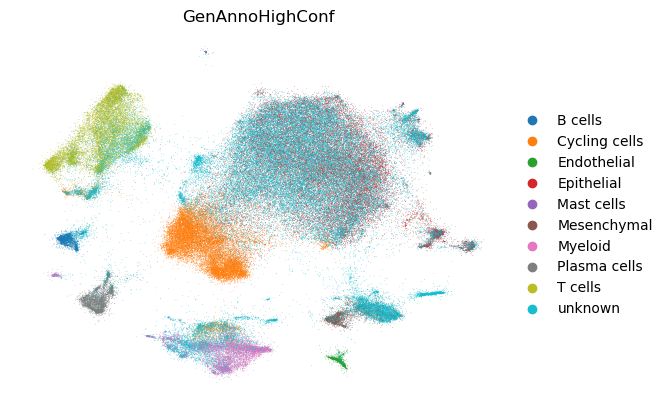

In [16]:
sc.pl.embedding(
    adata,
    basis="X_scanvi_MDE",
    color=["GenAnnoHighConf"],
    frameon=False,
    ncols=1)

In [17]:
import scvi 

In [18]:
adata_hvg = adata[:,adata.var["highly_variable"]].copy()

In [19]:
adata_hvg

AnnData object with n_obs × n_vars = 152319 × 4000
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden', 'celltypist_labels_Immune_All_High_highconf', 'GenAnno', 'GenAnnoV1', 'GenAnnoV2', 'celltypist_mapped', 'GenAnnoHighConf', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'GenAnnoHighConf_colors', 'GenAnnoV1_colors', 'GenAnnoV2_colors', 'celltypist_labels_Immune_All_High_highconf_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_pca_MDE', 'X_scANVI', 'X

In [20]:
scanvi_model = scvi.model.SCANVI.load("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/models/scanvi_model", adata_hvg)


INFO     File /home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/models/scanvi_model/model.pt already        
         downloaded                                                                                                


/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/igarzonalva/.conda/envs/scvi-env/lib/python3.1 ...
/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed

In [39]:
history = scanvi_model.history

In [41]:
history

{'train_loss_step':       train_loss_step
 epoch                
 0         1151.134399
 1         1219.721436
 2         1117.300659
 3         1225.213257
 4         1210.515137
 5            1116.875
 6         1166.037476
 7         1238.352051
 8         1216.798828
 9         1285.243408
 10         1198.77002
 11        1098.192505
 12         1157.63269
 13        1231.039307
 14        1130.495972
 15        1218.986328
 16        1200.476318
 17        1201.290405
 18        1136.415649
 19        1206.780029
 20        1189.575562
 21        1126.960327
 22        1197.550049
 23          1155.0271
 24        1213.426636
 25        1168.475952
 26        1178.390381
 27        1194.233276
 28        1188.645264
 29        1188.368042
 30         1209.76416
 31        1165.419189
 32         1138.33374
 33        1214.241821
 34        1211.466797
 35        1113.686035
 36        1139.553223
 37        1234.893555
 38        1121.024414
 39        1142.851929,
 'train_loss_e

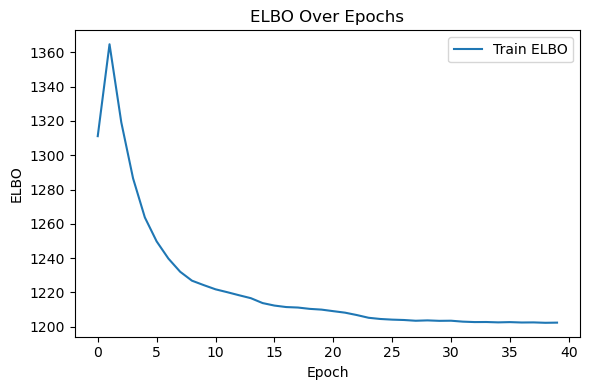

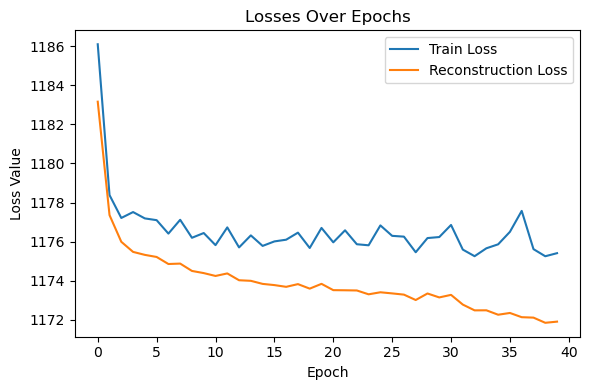

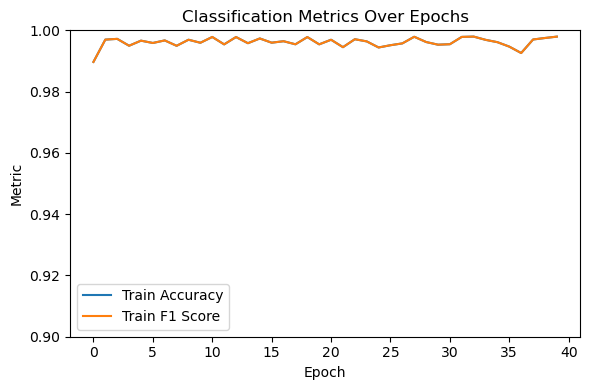

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df_list = []
for metric_name, metric_df in history.items():
    # If each metric_df is a DataFrame with exactly one column, rename it:
    if isinstance(metric_df, pd.DataFrame) or isinstance(metric_df, pd.Series):
        # Ensure we convert a Series to DataFrame if needed
        if isinstance(metric_df, pd.Series):
            metric_df = metric_df.to_frame()
        old_col = metric_df.columns[0]
        metric_df = metric_df.rename(columns={old_col: metric_name})
        df_list.append(metric_df)
    else:
        print(f"{metric_name} is not a DataFrame or Series.")

df_history = pd.concat(df_list, axis=1)

# Now df_history has one column per metric keyed by epoch.
# Plot a few metrics as examples:

plt.figure(figsize=(6, 4))
plt.plot(df_history["elbo_train"], label="Train ELBO")
plt.title("ELBO Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("ELBO")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(df_history["train_loss_epoch"], label="Train Loss")
plt.plot(df_history["reconstruction_loss_train"], label="Reconstruction Loss")
plt.title("Losses Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(df_history["train_accuracy"], label="Train Accuracy")
plt.plot(df_history["train_f1_score"], label="Train F1 Score")
plt.title("Classification Metrics Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.ylim(0.9, 1.0)  
plt.tight_layout()
plt.show()


In [21]:
adata.obs["predicted_labels"] = scanvi_model.predict()

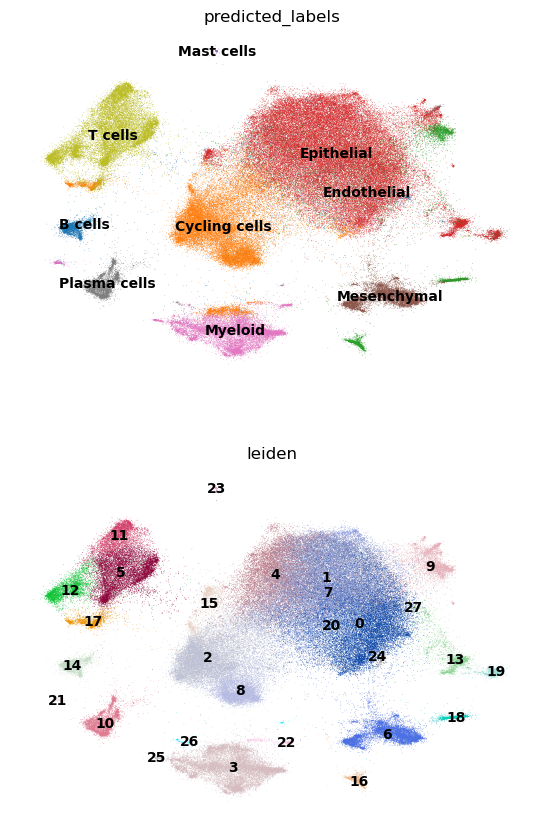

In [26]:
sc.pl.embedding(
    adata,
    basis="X_scanvi_MDE",
    color=["predicted_labels","leiden"],
    frameon=False, legend_loc="on data", 
    ncols=1)

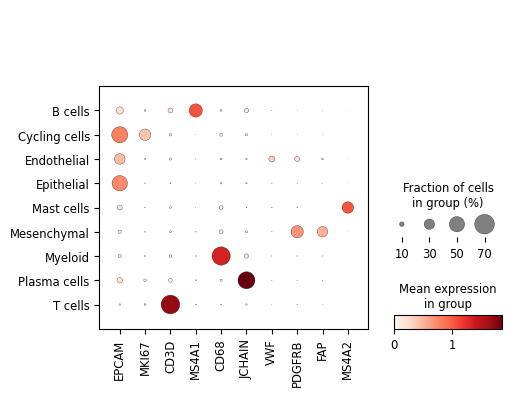

In [23]:
general_markers  = ["EPCAM","MKI67", "CD3D", "MS4A1", "CD68","JCHAIN", "VWF", "PDGFRB","FAP","MS4A2"]


sc.pl.dotplot(adata=adata, var_names=general_markers, groupby="predicted_labels")

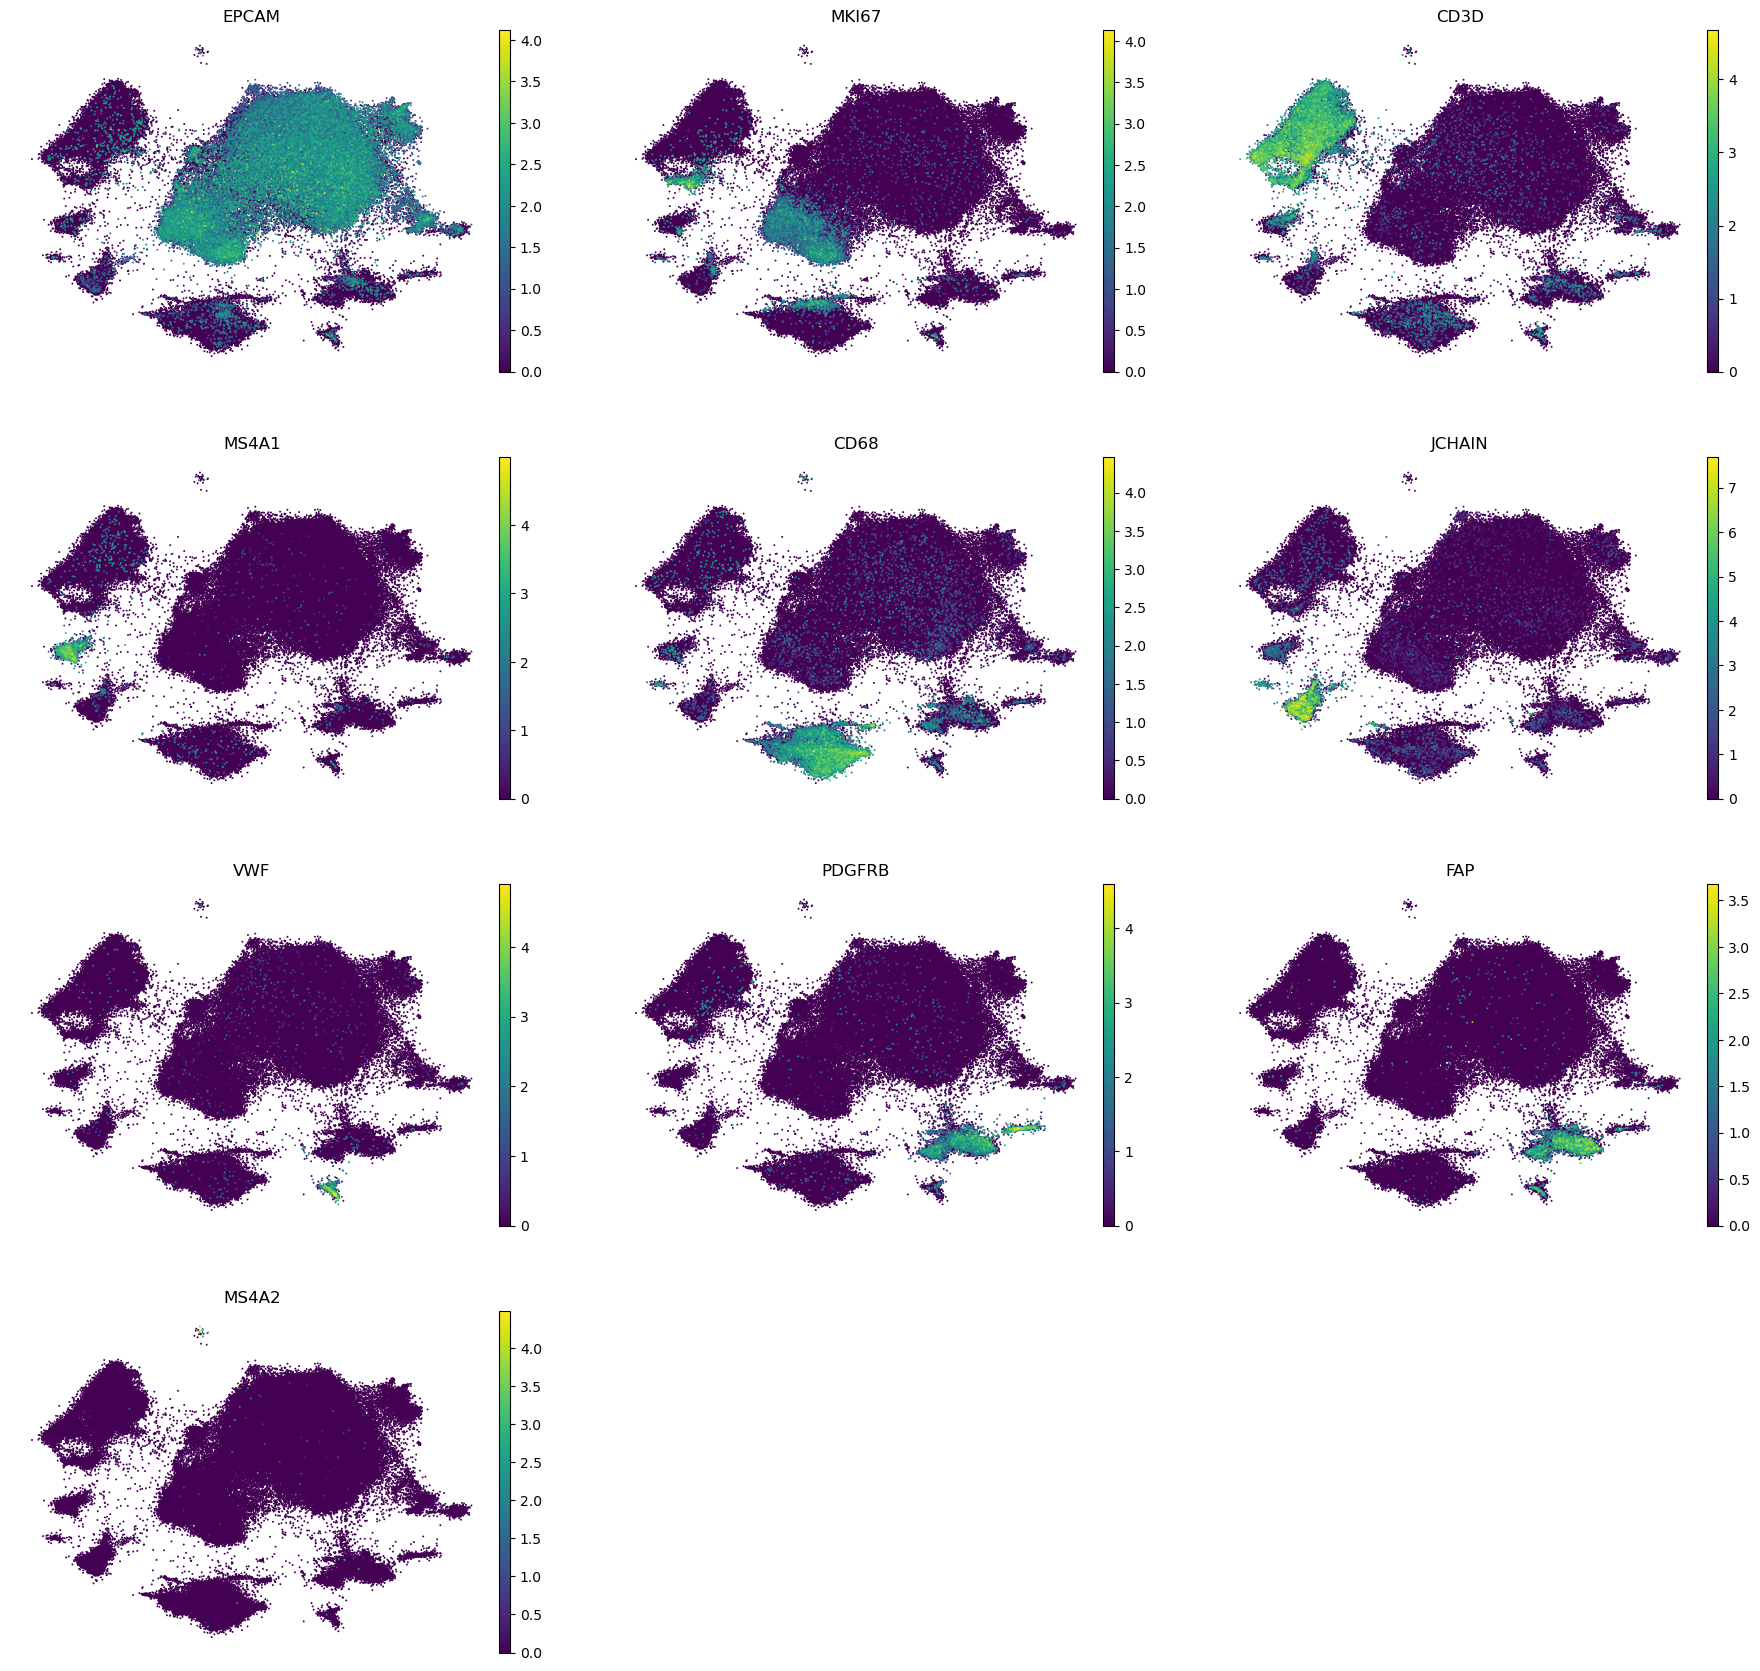

In [24]:
sc.pl.embedding(
    adata,
    basis="X_scanvi_MDE",
    color=general_markers,
    frameon=False,
    ncols=3, size = 8)

In [27]:
mask = adata.obs.leiden == "18"

In [28]:
mask

AAACCTGAGAAACCGC-1-PM0337-    False
AAACCTGAGACCCACC-1-PM0337-    False
AAACCTGCACCTGGTG-1-PM0337-    False
AAACCTGCACTAGTAC-1-PM0337-    False
AAACCTGCAGGCGATA-1-PM0337-    False
                              ...  
TTTGTCAAGTTAGGTA-1-MH0126-    False
TTTGTCACACGTGAGA-1-MH0126-    False
TTTGTCACATCGGAAG-1-MH0126-    False
TTTGTCATCCCGACTT-1-MH0126-    False
TTTGTCATCCTGTACC-1-MH0126-    False
Name: leiden, Length: 152319, dtype: bool

In [29]:
adata.obs['GennAnno_ScAnvi'] = adata.obs.predicted_labels

In [30]:
adata.obs.loc[mask, "GennAnno_ScAnvi"] = "Mesenchymal" # add new annotation to the maskedcells

In [44]:
mask = adata.obs.leiden.isin(["0","1","4","7","20","9", "13", "19","24","27"])

In [45]:
mask

AAACCTGAGAAACCGC-1-PM0337-    False
AAACCTGAGACCCACC-1-PM0337-    False
AAACCTGCACCTGGTG-1-PM0337-    False
AAACCTGCACTAGTAC-1-PM0337-     True
AAACCTGCAGGCGATA-1-PM0337-     True
                              ...  
TTTGTCAAGTTAGGTA-1-MH0126-    False
TTTGTCACACGTGAGA-1-MH0126-    False
TTTGTCACATCGGAAG-1-MH0126-    False
TTTGTCATCCCGACTT-1-MH0126-    False
TTTGTCATCCTGTACC-1-MH0126-     True
Name: leiden, Length: 152319, dtype: bool

In [46]:
adata.obs.loc[mask, "GennAnno_ScAnvi"] = "Epithelial"

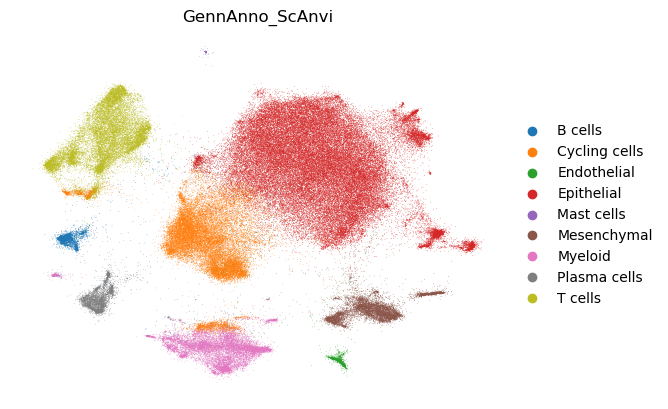

In [47]:
sc.pl.embedding(
    adata,
    basis="X_scanvi_MDE",
    color="GennAnno_ScAnvi",
    frameon=False,
    ncols=1)

In [48]:
adata.write_h5ad("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/adata/adata_scanvi_predictions.h5ad")